# Multi Plot Grids

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
penguins = sns.load_dataset('penguins')

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# FacetGrid
https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid

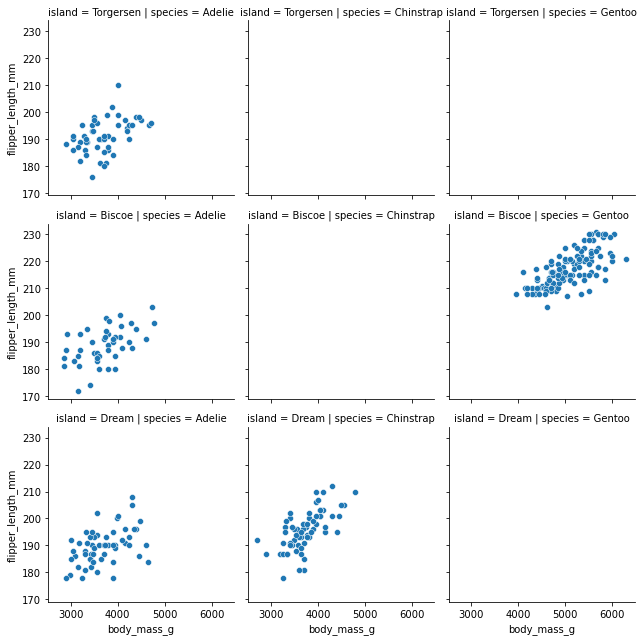

In [4]:
# You're already familiar with relplots and displots

sns.relplot(data=penguins, x= 'body_mass_g', y='flipper_length_mm', row='island', col='species', kind='scatter', height=3)

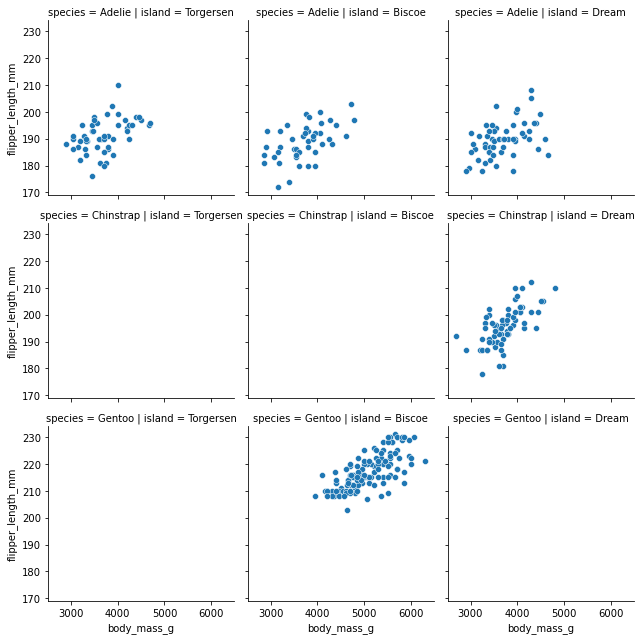

In [5]:
# You can also use FacetGrid directly to create a FacetGrid object
#... and plot charts on the grids

g = sns.FacetGrid(data=penguins, col='island',row='species')
g.map_dataframe(sns.scatterplot,x='body_mass_g', y='flipper_length_mm')

# pairplot
https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot

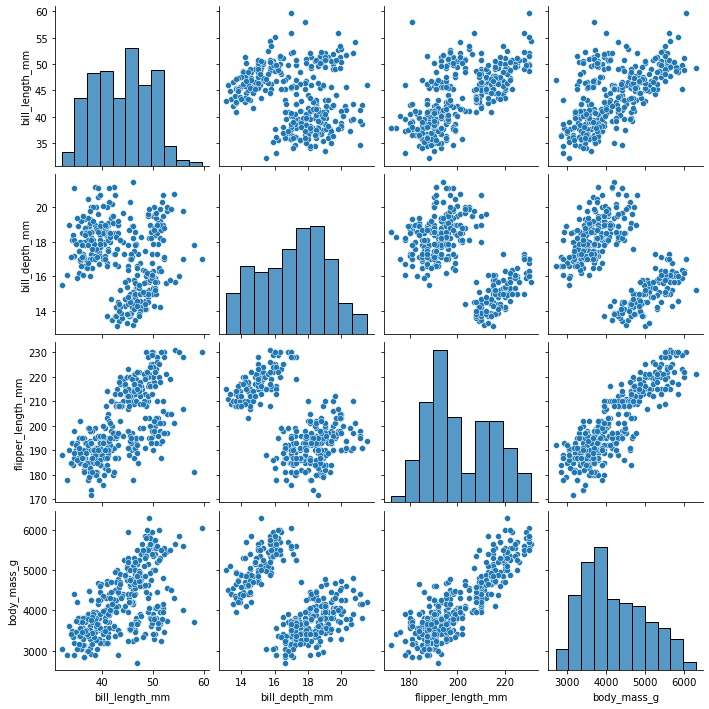

In [6]:
# Creating a pairplot
# Ensure you do not have too many numerical columns, 4 numerical columns results in 16 plots, 8 results in 64 etc...

sns.pairplot(penguins)

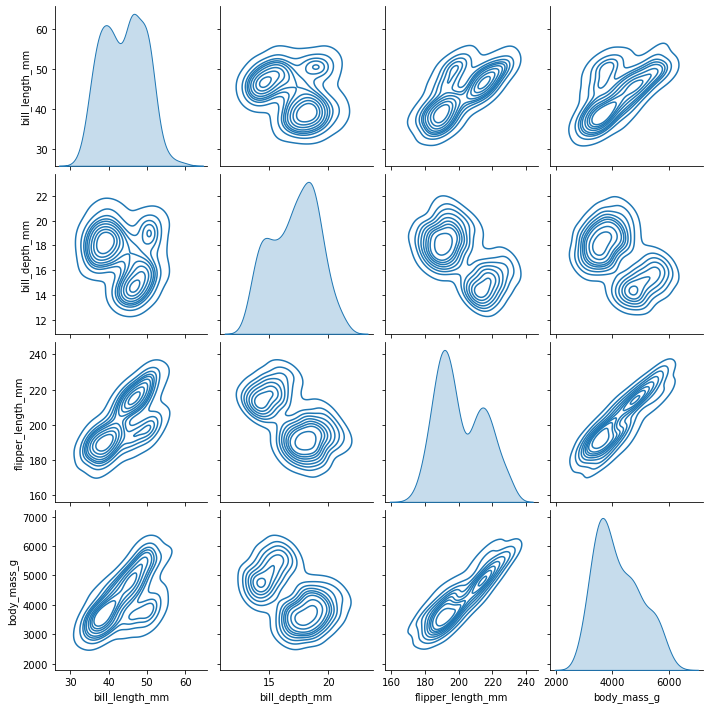

In [7]:
# Changing kind to kde, by default its scatter

sns.pairplot(penguins, kind='kde')

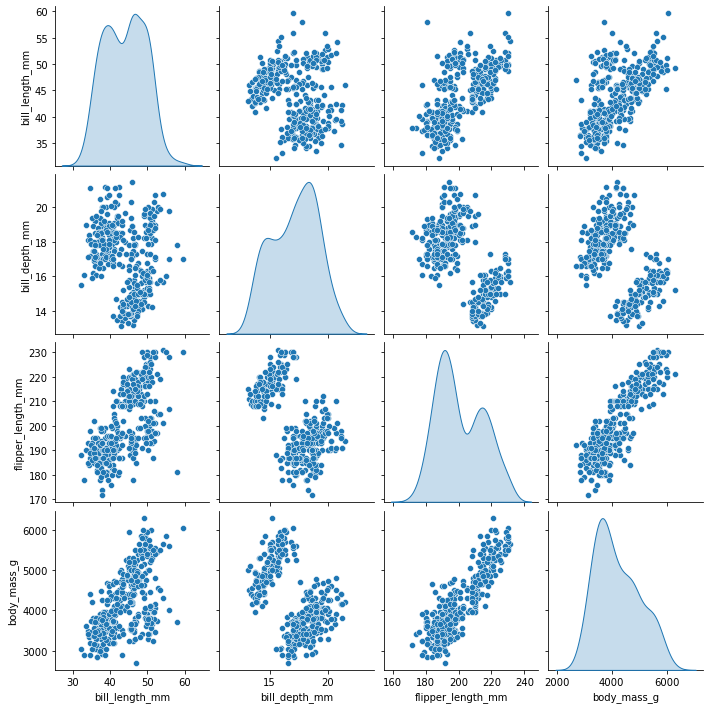

In [8]:
# Changing diag_kind to kde, by default its hist

sns.pairplot(penguins, diag_kind='kde')

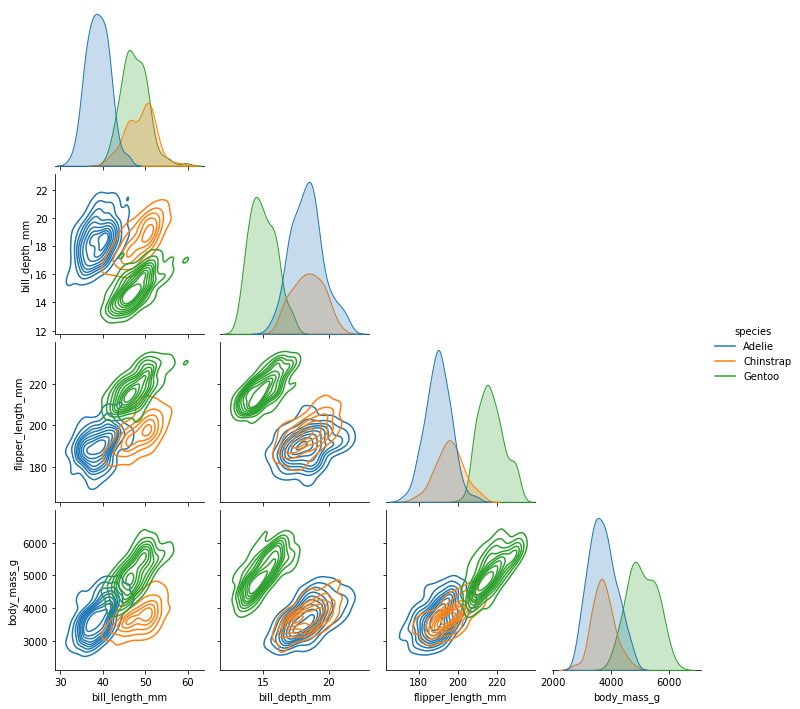

In [9]:
# Removing the corner and adding a hue

sns.pairplot(penguins, kind='kde', corner=True, hue='species')

# PairGrid
https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid

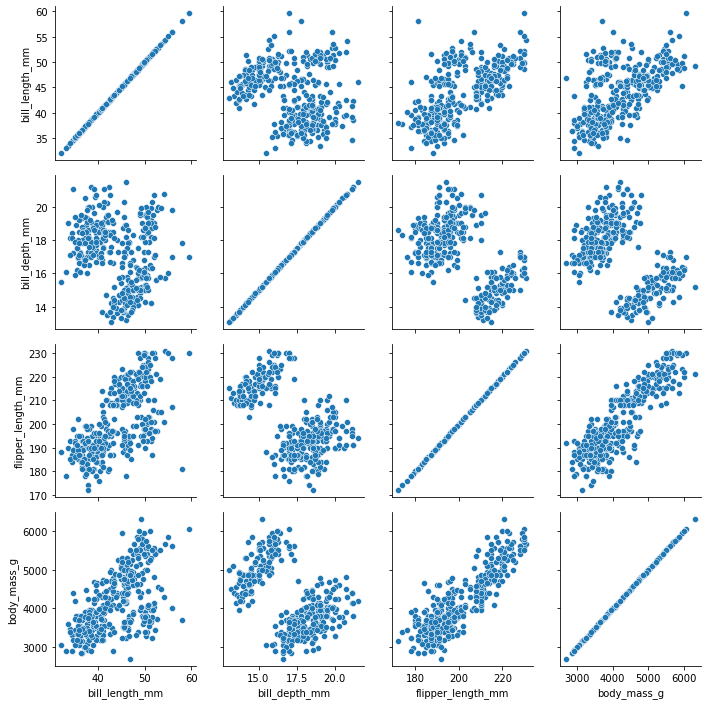

In [10]:
# Creating a PairGrid object and mapping scatterplots onto it

g=sns.PairGrid(penguins)
g.map(sns.scatterplot)

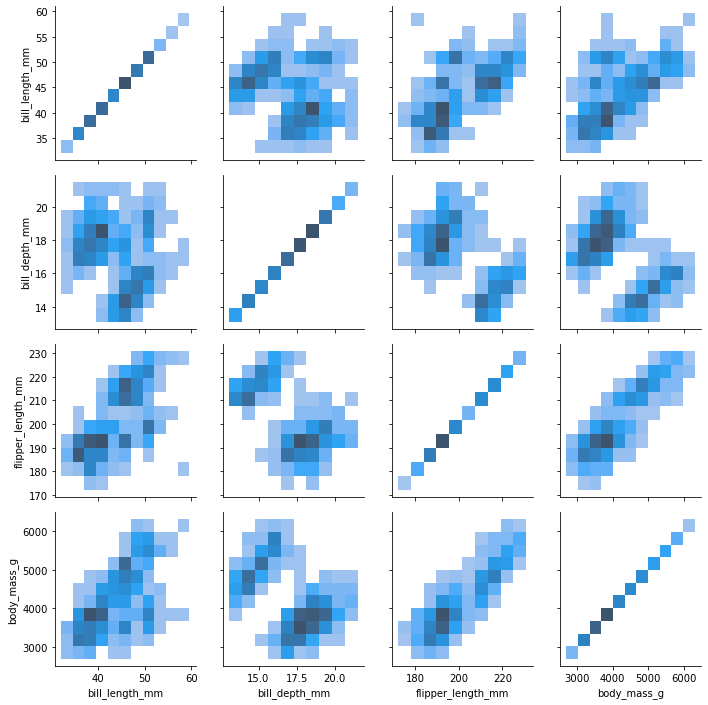

In [11]:
# Creating a PairGrid object and mapping histplots onto it

g=sns.PairGrid(penguins)
g.map(sns.histplot)

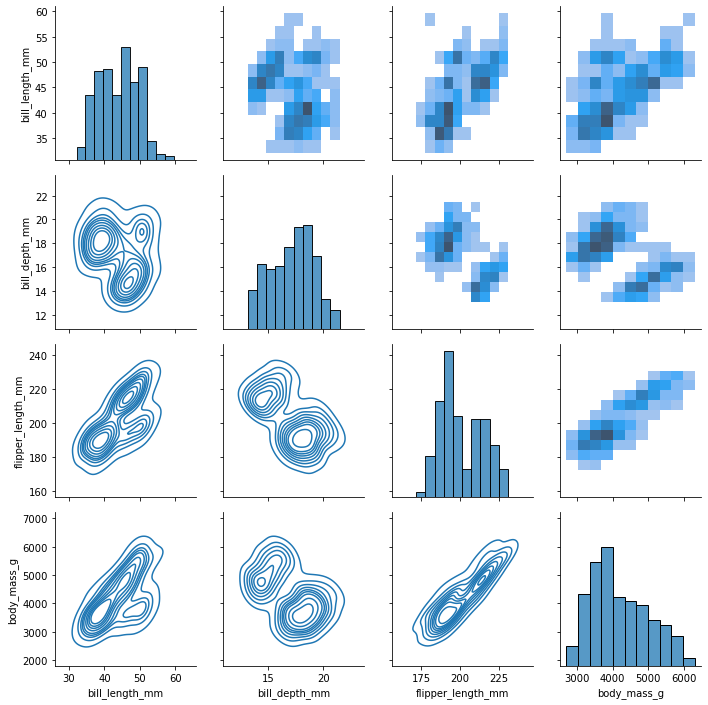

In [12]:
# Mapping different plots to different areas of the PairGrid

g = sns.PairGrid(penguins)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)
g.map_upper(sns.histplot)

## jointplot
https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot

<AxesSubplot:xlabel='bill_length_mm', ylabel='body_mass_g'>

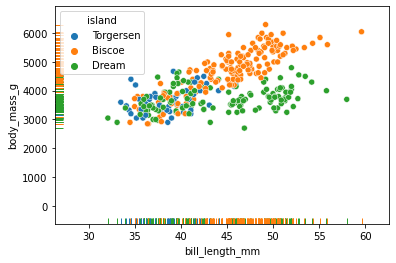

In [13]:
# You can combine two plots on the same axis


sns.rugplot(data=penguins, x="bill_length_mm", y="body_mass_g", hue='island')
sns.scatterplot(data=penguins, x="bill_length_mm", y="body_mass_g", hue='island')

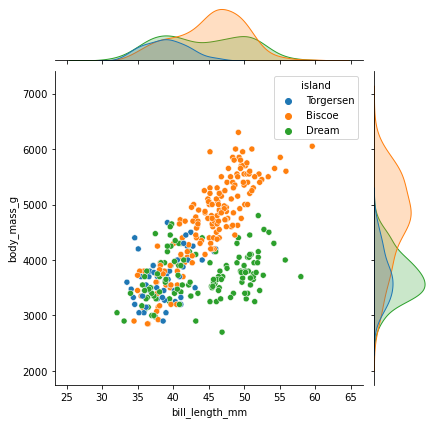

In [14]:
# ...Or use a jointplot

sns.jointplot(data=penguins, x="bill_length_mm", y="body_mass_g", hue='island')

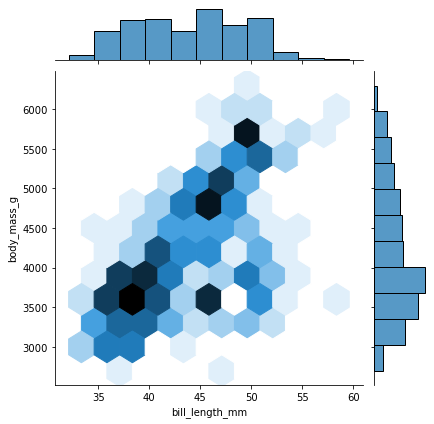

In [15]:
# Changing kind to hex

sns.jointplot(data=penguins, x="bill_length_mm", y="body_mass_g", kind='hex')

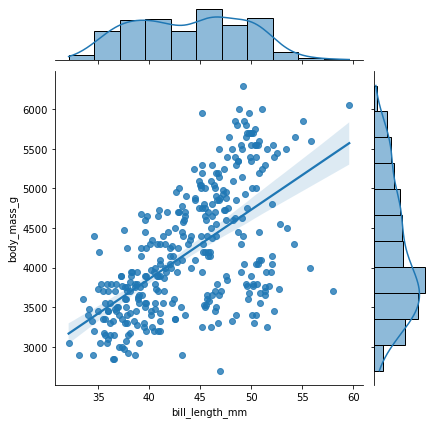

In [16]:
# Changing kind to reg

sns.jointplot(data=penguins, x="bill_length_mm", y="body_mass_g", kind='reg')

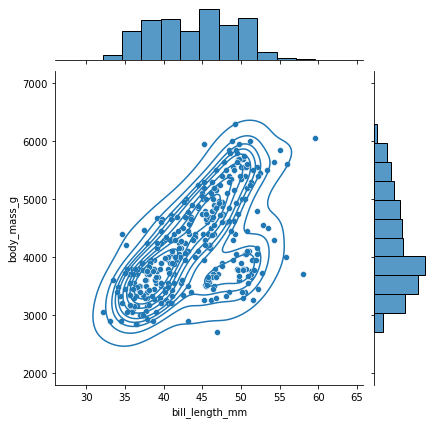

In [17]:
# Using the plot_joint method to plot a kdeplot on the joint axes

sns.jointplot(data=penguins, x="bill_length_mm", y="body_mass_g").plot_joint(sns.kdeplot)

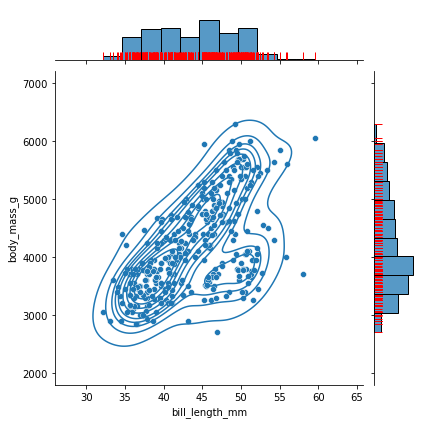

In [18]:
# Using the plot_joint method to plot a kdeplot on the joint axes
# Using the plot_marginal method to plot a rugplot on the marginal axes

g=sns.jointplot(data=penguins, x='bill_length_mm', y='body_mass_g')
g.plot_joint(sns.kdeplot)
g.plot_marginals(sns.rugplot,color='r', height=0.15)

# JointGrid
https://seaborn.pydata.org/generated/seaborn.JointGrid.html#seaborn.JointGrid

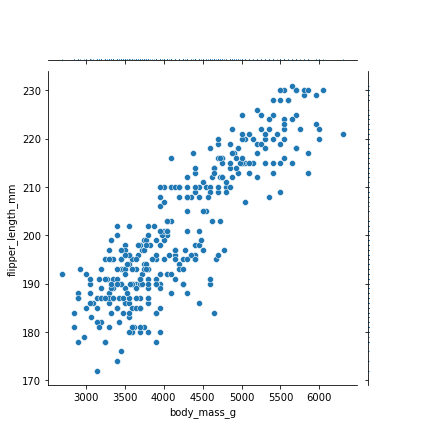

In [19]:
# Creating a JointGrid and plotting a scatterplot on the joint axes

g=sns.JointGrid(data=penguins,x='body_mass_g', y='flipper_length_mm')
g.plot(sns.scatterplot, sns.rugplot)

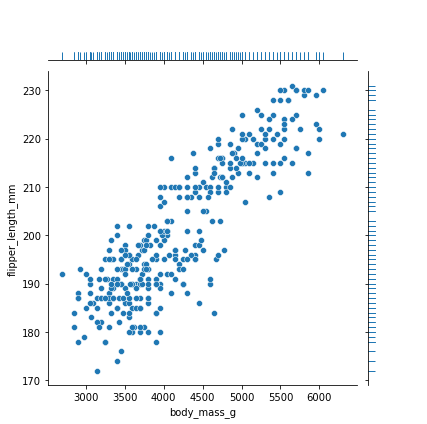

In [20]:
# Creating a JointGrid and plotting a scatterplot on the joint axes
# Creating a JointGrid and plotting a rugplpy on the marginal axes

g=sns.JointGrid(data=penguins,x='body_mass_g', y='flipper_length_mm')
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.rugplot, height=0.15)

<AxesSubplot:xlabel='Density', ylabel='flipper_length_mm'>

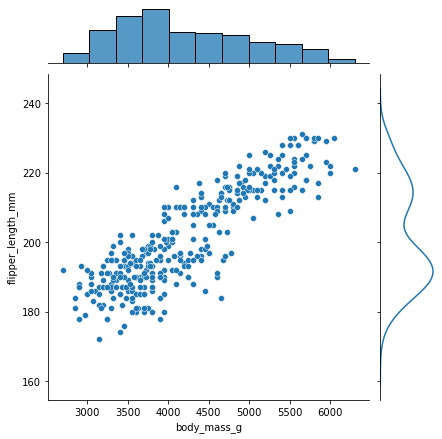

In [21]:
# Targeting the x and y marginal axes seperately to add different plots on each

g=sns.JointGrid()
sns.scatterplot(data=penguins, x='body_mass_g', y='flipper_length_mm', ax=g.ax_joint)
sns.histplot(data=penguins, x='body_mass_g', ax=g.ax_marg_x)
sns.kdeplot(data=penguins, y='flipper_length_mm', ax=g.ax_marg_y)